# Tugas Bengkod 4

Nama : Dive Oktabid Fikhri

Nim  : A11.2022.14202

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import time
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mengatur tampilan visualisasi
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12, 8)

## EDA

In [ ]:
# Membaca dataset
print("==== MEMBACA DATASET ====")
# Menentukan nama kolom karena dataset tidak memiliki header
kolom = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
         'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
         'hours-per-week', 'native-country', 'income']

# Membaca dataset dengan nama kolom yang telah ditentukan
df = pd.read_csv('/content/drive/MyDrive/bengkod/adult.csv', names=kolom, header=None, na_values=' ?')

print("\nInformasi Dataset:")
print(df.info())

==== MEMBACA DATASET ====

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [ ]:
# Melihat statistik deskriptif
print("\nStatistik Deskriptif:")
print(df.describe())

# Melihat 5 data teratas
print("\n5 Data Teratas:")
print(df.head())


Statistik Deskriptif:
                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  

5 Data Teratas:
   age          workcla

## PreProcessing

### Data Imbalance


Distribusi Target Income:
income
<=50K    24720
>50K      7841
Name: count, dtype: int64


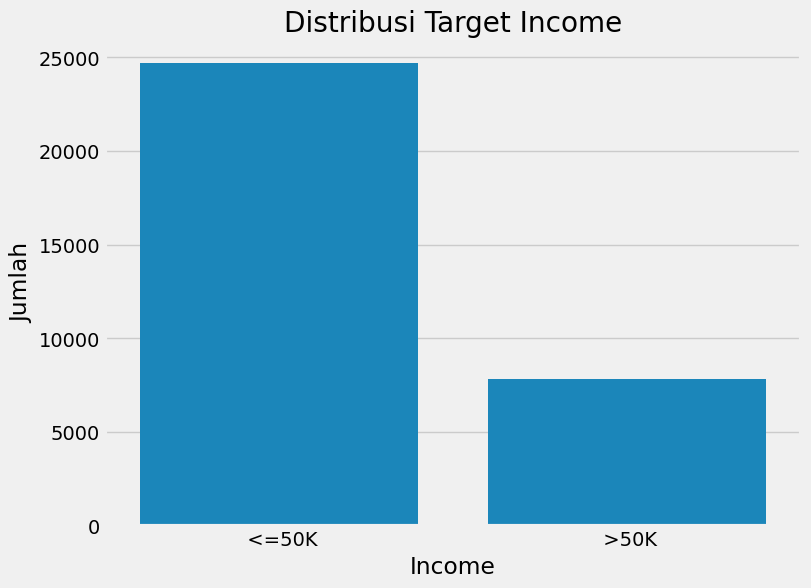

In [ ]:
# Distribusi Target Income
print("\nDistribusi Target Income:")
print(df['income'].value_counts())

# Visualisasi distribusi target income
plt.figure(figsize=(8, 6))
sns.countplot(x='income', data=df)
plt.title('Distribusi Target Income')
plt.xlabel('Income')
plt.ylabel('Jumlah')
plt.show()



Jumlah sampel per kelas (income) setelah resampling:
income
<=50K    24720
>50K     24720
Name: count, dtype: int64


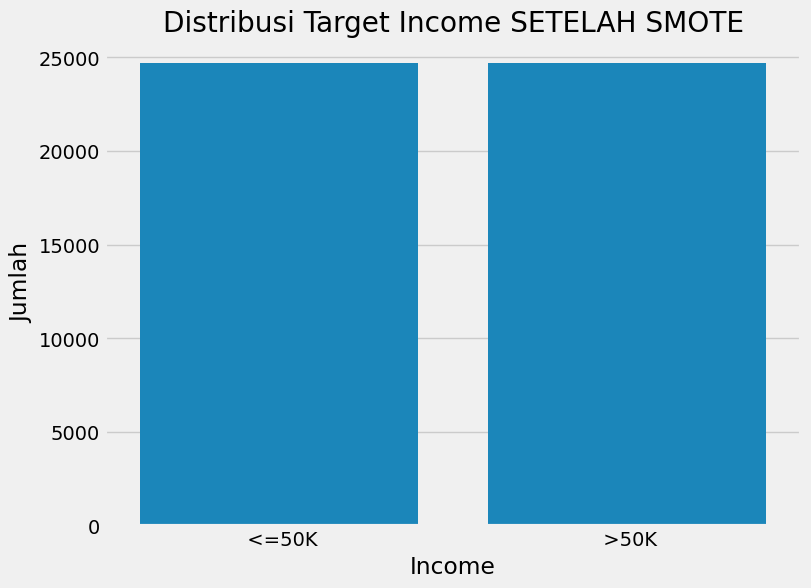

In [ ]:
# Pisahkan fitur (X) dan target (y)
X = df.drop('income', axis=1)
y = df['income']

# Lakukan label encoding pada fitur kategorikal
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col].astype(str))

# Tangani missing values dengan imputasi mean
X = X.fillna(X.mean())

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Terapkan SMOTE untuk menyeimbangkan data
X_drop, y_drop = smote.fit_resample(X, y)

# Ubah kembali ke DataFrame
df_drop = pd.DataFrame(X_drop, columns=X.columns)
df_drop['income'] = y_drop

# Periksa keseimbangan kelas setelah resampling
income_counts_encoded = df_drop ['income'].value_counts()
print("\nJumlah sampel per kelas (income) setelah resampling:")
print(income_counts_encoded)

# Visualisasi distribusi target income SETELAH SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x='income', data=df_drop)
plt.title('Distribusi Target Income SETELAH SMOTE')
plt.xlabel('Income')
plt.ylabel('Jumlah')
plt.show()

### Missing Value

In [ ]:
# Hitung jumlah missing value per kolom
missing_values = df.isnull().sum()
print("\nJumlah missing value per kolom:")
print(missing_values)


Jumlah missing value per kolom:
age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64


In [ ]:
# Handling missing values
for col in df.columns:
    if df[col].dtype == 'object':  # Kategorikal
        df[col] = df[col].fillna(df[col].mode()[0])
    else:  # Numerik
        df[col] = df[col].fillna(df[col].median())

print("\nJumlah missing value per kolom setelah handling:")
print(df.isnull().sum())



Jumlah missing value per kolom setelah handling:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


### Duplikat

In [ ]:
# Memeriksa Duplikasi Data
print("\n==== MEMERIKSA DUPLIKASI DATA ====")
duplicates = df.duplicated().sum()
print(f"Jumlah data duplikat: {duplicates}")

# Menghapus data duplikat jika ada
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Data duplikat telah dihapus. Ukuran dataset sekarang: {df.shape}")


==== MEMERIKSA DUPLIKASI DATA ====
Jumlah data duplikat: 24
Data duplikat telah dihapus. Ukuran dataset sekarang: (32537, 15)


### Outlier


==== MEMERIKSA DAN MENANGANI OUTLIERS ====


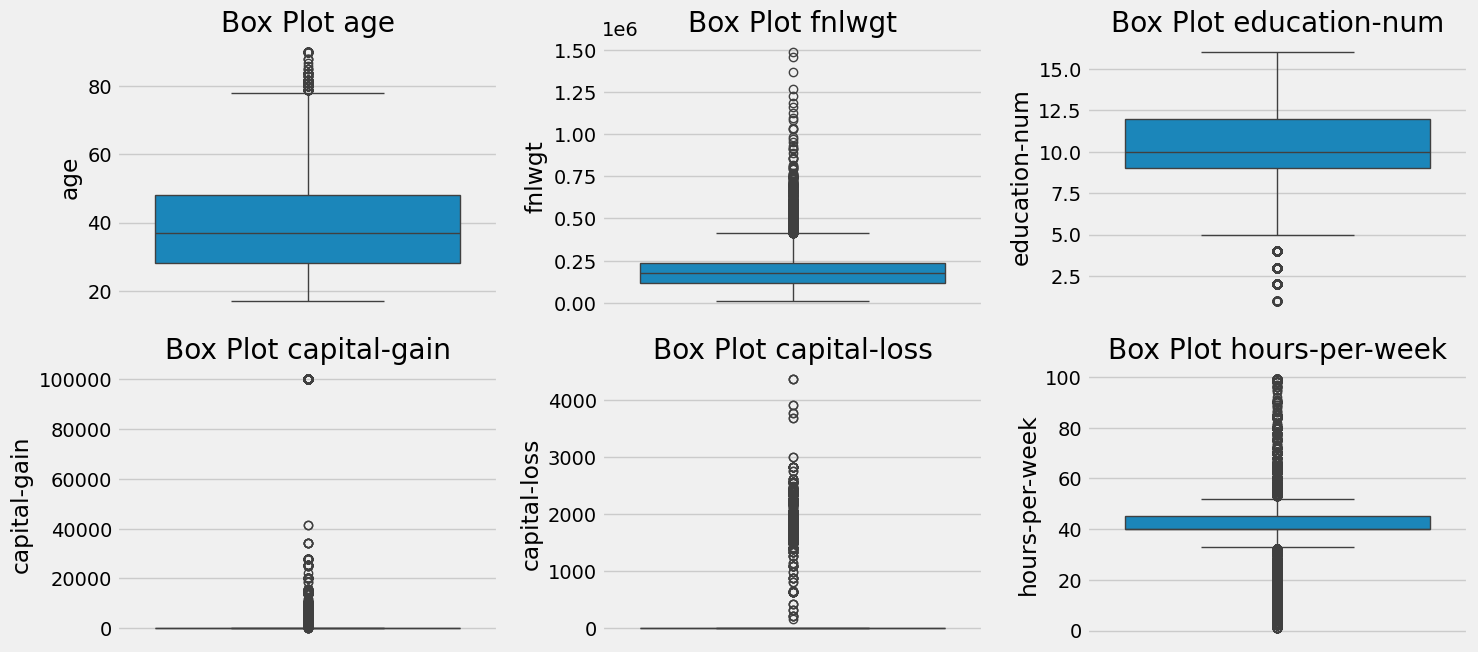

In [ ]:
# Memeriksa dan Menangani Outliers (untuk fitur numerik)
print("\n==== MEMERIKSA DAN MENANGANI OUTLIERS ====")
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Visualisasi box plot untuk fitur numerik
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot {col}')
plt.tight_layout()
plt.savefig('outliers_boxplot.png')
plt.show()

In [ ]:
# Menangani outliers dengan metode IQR untuk kolom penting
cols_for_outlier_treatment = ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']
print("\nStatistik sebelum menangani outliers:")
print(df[cols_for_outlier_treatment].describe())

# Fungsi untuk menangani outliers dengan metode IQR (Interquartile Range)
def handle_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Mengganti outliers dengan batas atas dan bawah
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

    return df

# Menangani outliers untuk kolom-kolom tertentu
for col in cols_for_outlier_treatment:
    df = handle_outliers(df, col)

print("\nStatistik setelah menangani outliers:")
print(df[cols_for_outlier_treatment].describe())


Statistik sebelum menangani outliers:
                age        fnlwgt  capital-gain  capital-loss  hours-per-week
count  32537.000000  3.253700e+04  32537.000000  32537.000000    32537.000000
mean      38.585549  1.897808e+05   1078.443741     87.368227       40.440329
std       13.637984  1.055565e+05   7387.957424    403.101833       12.346889
min       17.000000  1.228500e+04      0.000000      0.000000        1.000000
25%       28.000000  1.178270e+05      0.000000      0.000000       40.000000
50%       37.000000  1.783560e+05      0.000000      0.000000       40.000000
75%       48.000000  2.369930e+05      0.000000      0.000000       45.000000
max       90.000000  1.484705e+06  99999.000000   4356.000000       99.000000

Statistik setelah menangani outliers:
                age         fnlwgt  capital-gain  capital-loss  hours-per-week
count  32537.000000   32537.000000       32537.0       32537.0    32537.000000
mean      38.559855  186824.961736           0.0           0.0

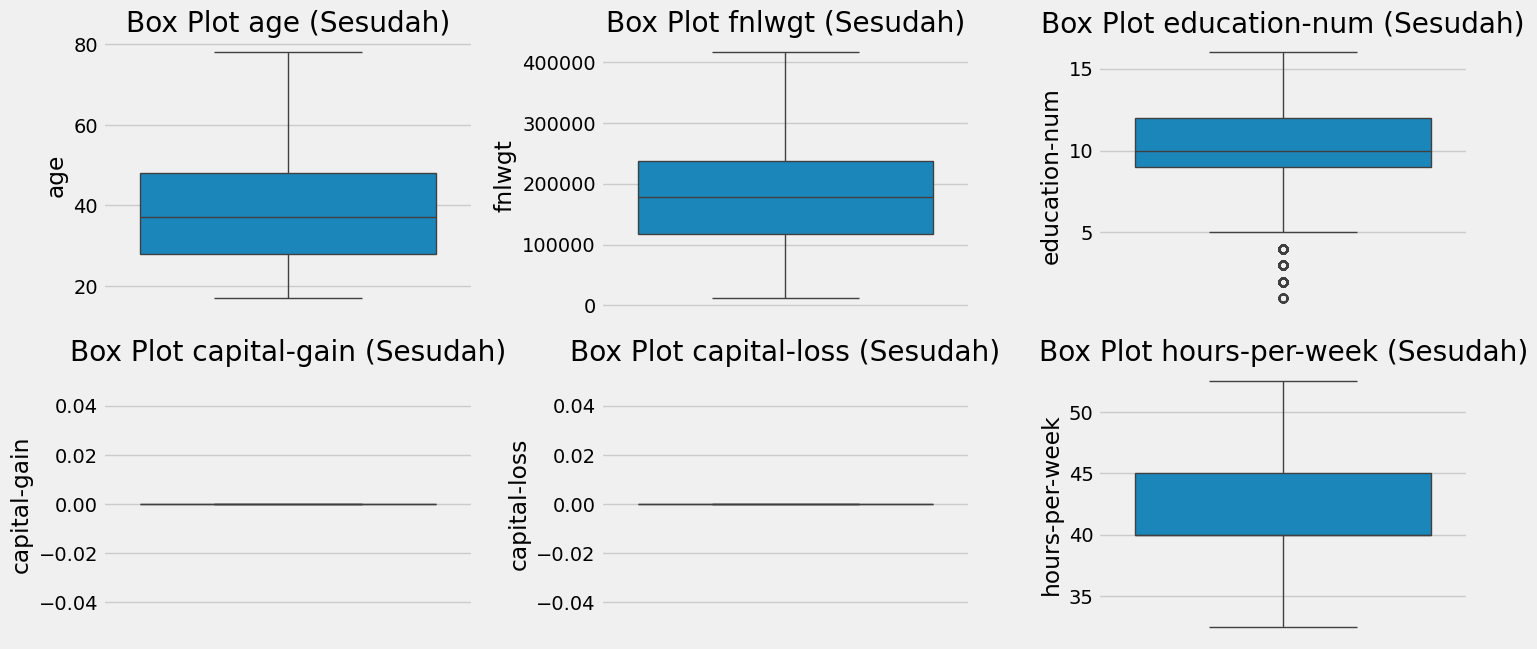

In [ ]:
# Visualisasi box plot untuk fitur numerik SESUDAH penanganan outlier
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot {col} (Sesudah)')
plt.tight_layout()
plt.show()

### Kategorikal - Numerik


==== PREPROCESSING FITUR KATEGORIKAL ====
Kolom kategorikal: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']


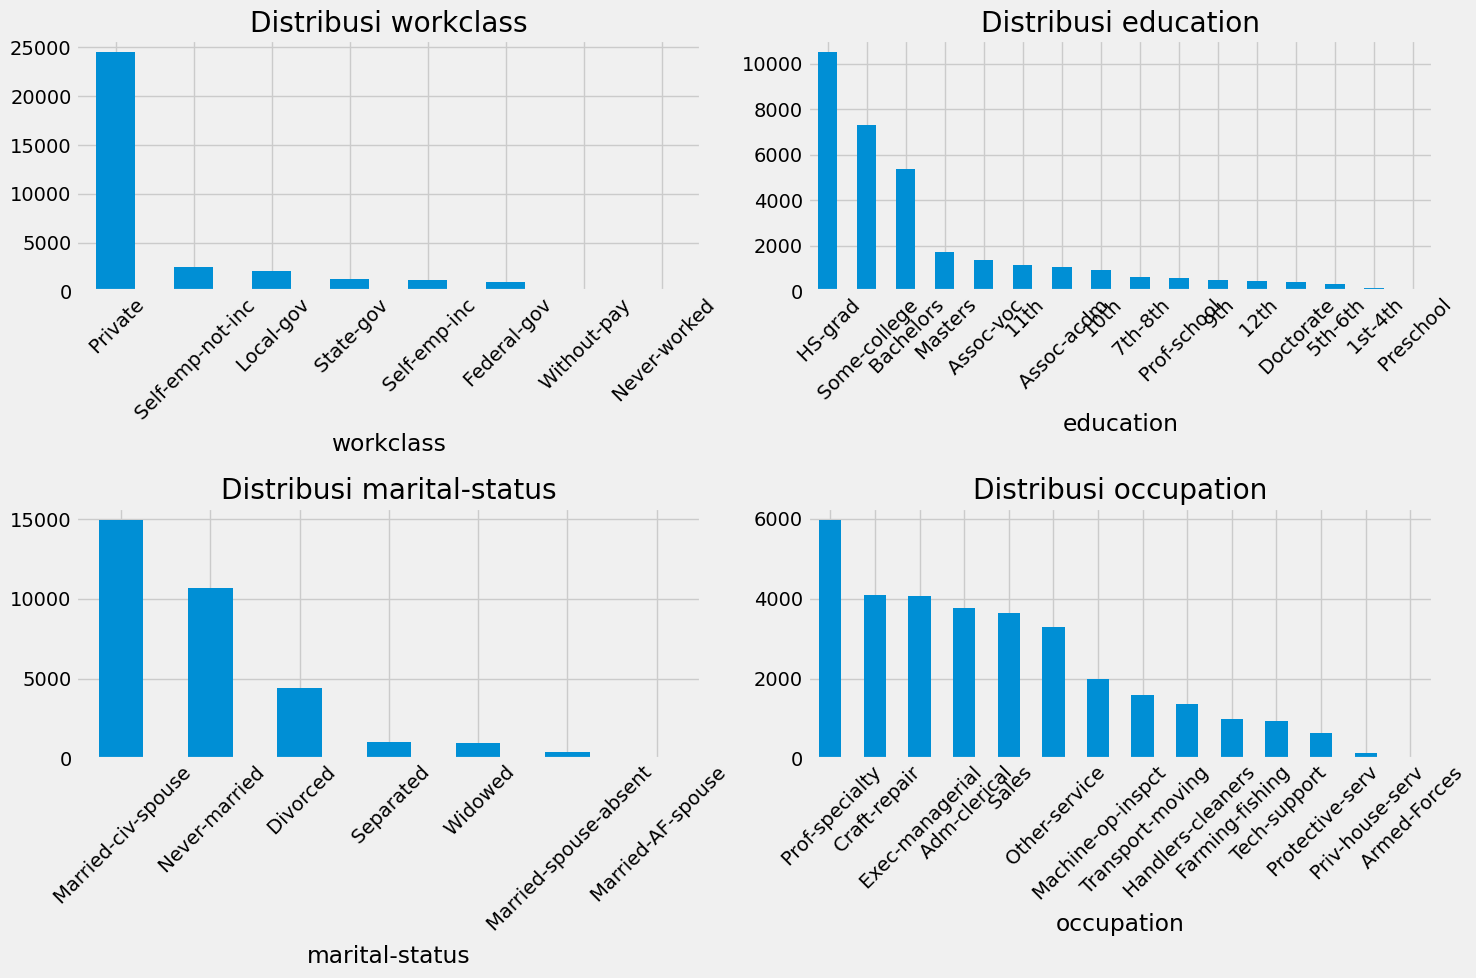


Setelah label encoding, 5 data teratas:
    age  workclass    fnlwgt  education  education-num  marital-status  \
0  39.0          6   77516.0          9             13               4   
1  50.0          5   83311.0          9             13               2   
2  38.0          3  215646.0         11              9               0   
3  53.0          3  234721.0          1              7               2   
4  28.0          3  338409.0          9             13               2   

   occupation  relationship  race  sex  capital-gain  capital-loss  \
0           0             1     4    1           0.0           0.0   
1           3             0     4    1           0.0           0.0   
2           5             1     4    1           0.0           0.0   
3           5             0     2    1           0.0           0.0   
4           9             5     2    0           0.0           0.0   

   hours-per-week  native-country  income  
0            40.0              38       0  
1    

In [ ]:
# Preprocessing Fitur Kategorikal
print("\n==== PREPROCESSING FITUR KATEGORIKAL ====")
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"Kolom kategorikal: {list(categorical_cols)}")

# Visualisasi distribusi untuk beberapa fitur kategorikal penting
plt.figure(figsize=(15, 10))
for i, col in enumerate(['workclass', 'education', 'marital-status', 'occupation'], 1):
    plt.subplot(2, 2, i)
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribusi {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('categorical_distribution.png')
plt.show()

# Menggunakan Label Encoding untuk variabel kategorikal
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print("\nSetelah label encoding, 5 data teratas:")
print(df.head())

### Normalisasi

In [ ]:
# Split Data dan Normalisasi Fitur Numerik
print("\n==== SPLIT DATA DAN NORMALISASI ====")
# Memisahkan fitur dan target
X = df.drop('income', axis=1)
y = df['income']

# Split data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Ukuran data latih: {X_train.shape}")
print(f"Ukuran data uji: {X_test.shape}")

# Normalisasi fitur numerik dengan StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("\nSetelah normalisasi, beberapa data teratas:")
print(pd.DataFrame(X_train[:5], columns=X.columns))


==== SPLIT DATA DAN NORMALISASI ====
Ukuran data latih: (26029, 14)
Ukuran data uji: (6508, 14)

Setelah normalisasi, beberapa data teratas:
        age  workclass    fnlwgt  education  education-num  marital-status  \
0 -0.188070  -0.085231 -0.627661   0.181424      -0.421694        1.576031   
1  0.992956  -0.085231 -0.768050   0.181424      -0.421694       -1.732983   
2 -0.335699  -0.085231  0.237442   1.212212      -0.032368       -0.409377   
3  1.140584  -0.085231 -0.041966   0.181424      -0.421694       -1.732983   
4 -0.630955  -0.085231 -1.093903   0.181424      -0.421694       -0.409377   

   occupation  relationship      race       sex  capital-gain  capital-loss  \
0   -1.544331     -0.285447  0.395603 -1.415478           0.0           0.0   
1   -1.041421     -0.285447  0.395603  0.706475           0.0           0.0   
2   -1.544331     -0.905950  0.395603  0.706475           0.0           0.0   
3    1.724588     -0.285447 -1.954806  0.706475           0.0           0

## PEMODELAN DAN EVALUASI

In [ ]:
print("\n==== PEMODELAN DAN EVALUASI ====")

# Membuat fungsi untuk evaluasi model
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Mencatat waktu mulai pelatihan
    start_time = time.time()

    # Melatih model
    model.fit(X_train, y_train)

    # Mencatat waktu selesai pelatihan
    training_time = time.time() - start_time

    # Prediksi pada data uji
    y_pred = model.predict(X_test)

    # Menghitung akurasi
    accuracy = accuracy_score(y_test, y_pred)

    # Membuat classification report
    report = classification_report(y_test, y_pred, output_dict=True)

    # Membuat confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Menampilkan hasil
    print(f"\nModel: {model_name}")
    print(f"Waktu Pelatihan: {training_time:.4f} detik")
    print(f"Akurasi: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Visualisasi confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.savefig(f'confusion_matrix_{model_name}.png')
    plt.show()

    return {
        'model_name': model_name,
        'accuracy': accuracy,
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
        'f1_score': report['weighted avg']['f1-score'],
        'training_time': training_time,
        'confusion_matrix': cm
    }


==== PEMODELAN DAN EVALUASI ====



Evaluasi model Decision Tree...

Model: Decision Tree
Waktu Pelatihan: 0.1115 detik
Akurasi: 0.7720

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      4905
           1       0.53      0.58      0.55      1603

    accuracy                           0.77      6508
   macro avg       0.70      0.71      0.70      6508
weighted avg       0.78      0.77      0.77      6508



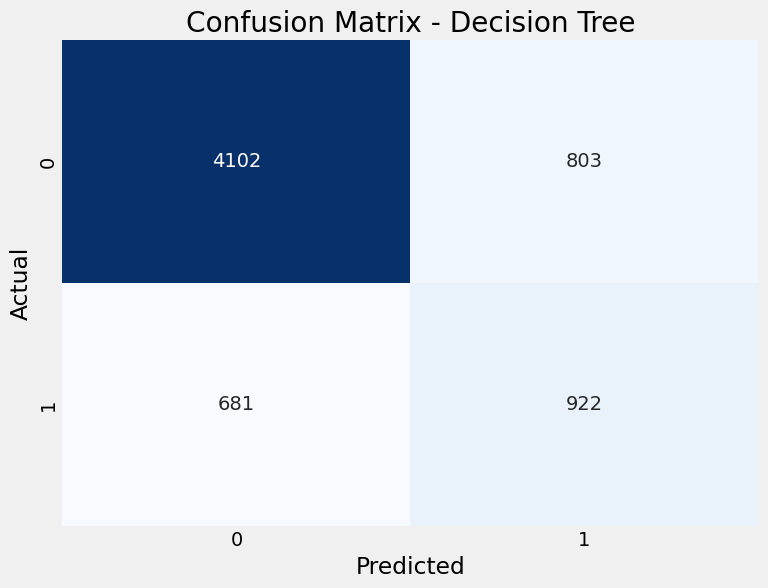


Evaluasi model Random Forest...

Model: Random Forest
Waktu Pelatihan: 2.1963 detik
Akurasi: 0.8308

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4905
           1       0.69      0.58      0.63      1603

    accuracy                           0.83      6508
   macro avg       0.78      0.75      0.76      6508
weighted avg       0.82      0.83      0.83      6508



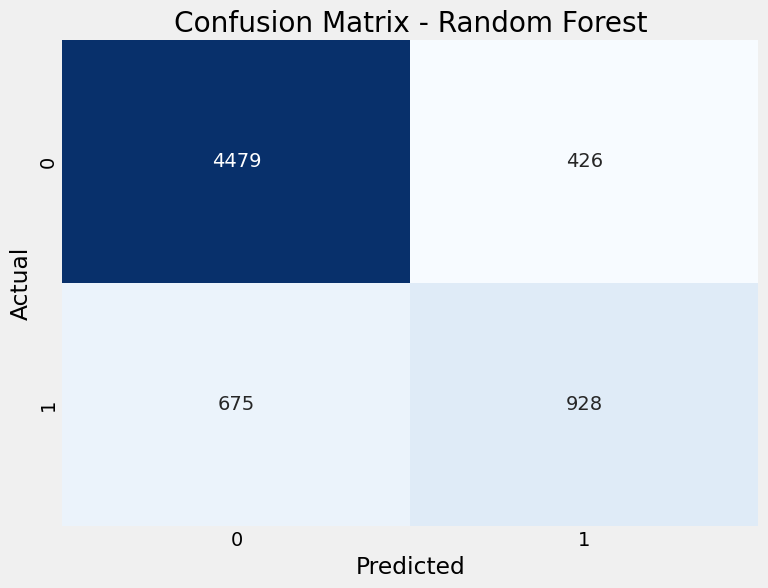


Evaluasi model KNN...

Model: KNN
Waktu Pelatihan: 0.0401 detik
Akurasi: 0.8171

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      4905
           1       0.64      0.58      0.61      1603

    accuracy                           0.82      6508
   macro avg       0.75      0.74      0.75      6508
weighted avg       0.81      0.82      0.81      6508



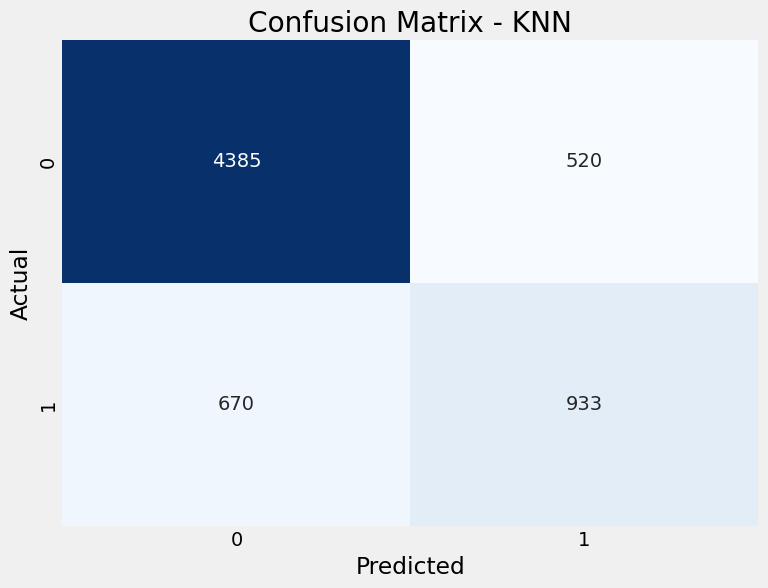


Evaluasi model Logistic Regression...

Model: Logistic Regression
Waktu Pelatihan: 0.0297 detik
Akurasi: 0.8081

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4905
           1       0.68      0.41      0.52      1603

    accuracy                           0.81      6508
   macro avg       0.76      0.68      0.70      6508
weighted avg       0.79      0.81      0.79      6508



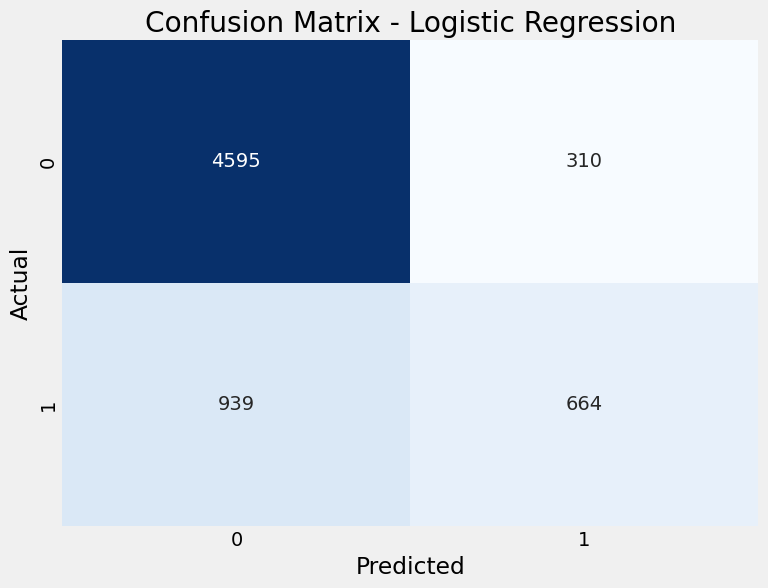


Evaluasi model SVM...

Model: SVM
Waktu Pelatihan: 10.7678 detik
Akurasi: 0.8290

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4905
           1       0.73      0.49      0.58      1603

    accuracy                           0.83      6508
   macro avg       0.79      0.71      0.74      6508
weighted avg       0.82      0.83      0.82      6508



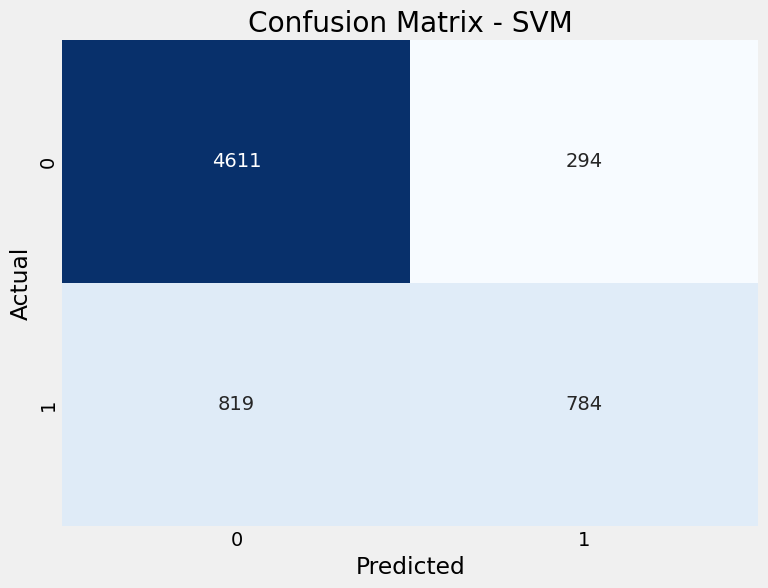

In [ ]:
# Daftar model yang akan dievaluasi
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(random_state=42)
}

# Evaluasi semua model
results = []
for model_name, model in models.items():
    print(f"\nEvaluasi model {model_name}...")
    result = evaluate_model(model, X_train, X_test, y_train, y_test, model_name)
    results.append(result)

## VISUALISASI PERBANDINGAN MODEL



==== VISUALISASI PERBANDINGAN MODEL ====


<Figure size 1400x800 with 0 Axes>

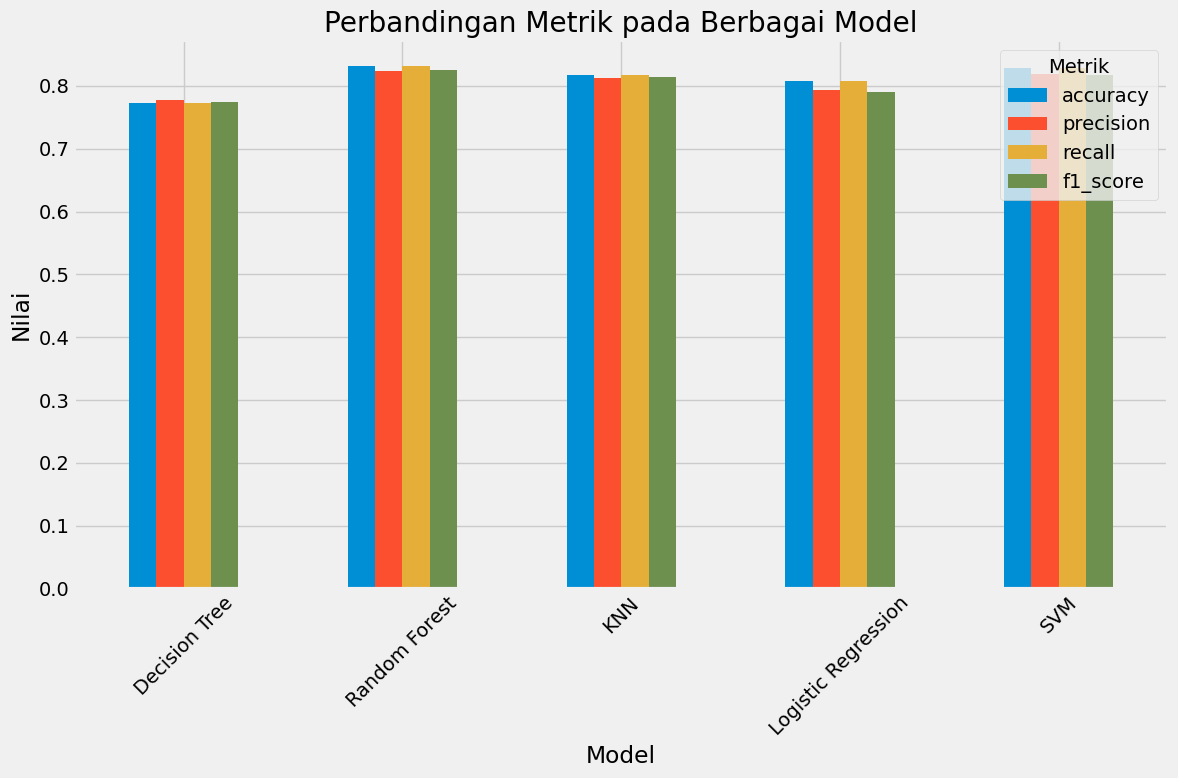

In [ ]:
print("\n==== VISUALISASI PERBANDINGAN MODEL ====")

# Membuat DataFrame untuk perbandingan
comparison_df = pd.DataFrame(results)
metrics = ['accuracy', 'precision', 'recall', 'f1_score']

# Visualisasi perbandingan metrik
plt.figure(figsize=(14, 8))
comparison_df[['model_name'] + metrics].set_index('model_name').plot(kind='bar')
plt.title('Perbandingan Metrik pada Berbagai Model')
plt.ylabel('Nilai')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.legend(title='Metrik')
plt.tight_layout()
plt.savefig('model_comparison_metrics.png')
plt.show()

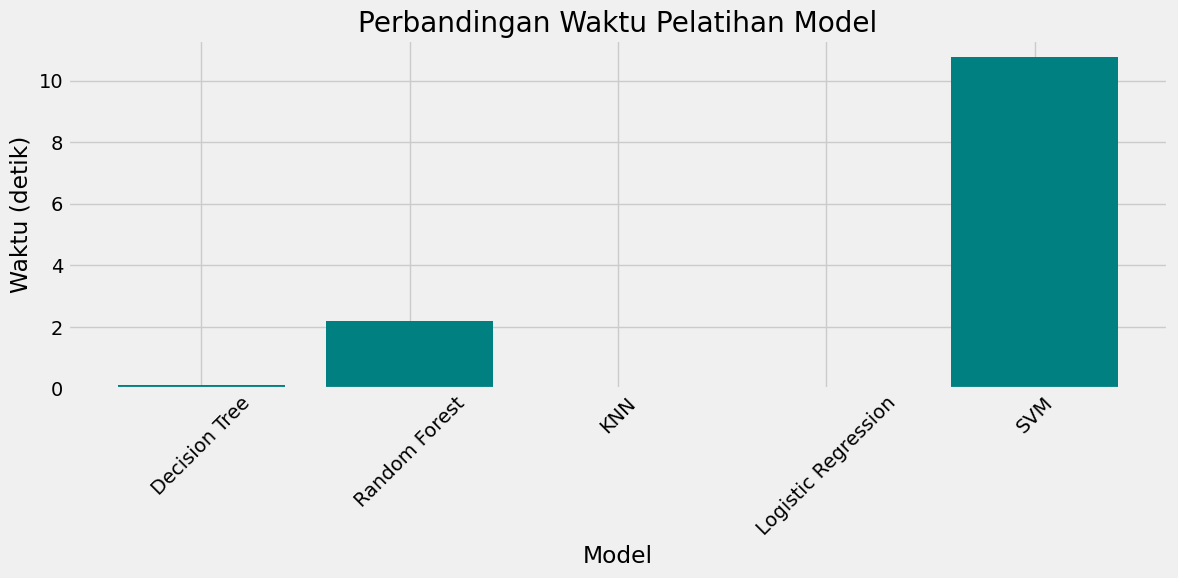

In [ ]:
# Visualisasi waktu pelatihan
plt.figure(figsize=(12, 6))
plt.bar(comparison_df['model_name'], comparison_df['training_time'], color='teal', bottom=0)
plt.title('Perbandingan Waktu Pelatihan Model')
plt.ylabel('Waktu (detik)')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('model_comparison_time.png')
plt.show()

## KESIMPULAN DAN REKOMENDASI

In [ ]:
print("\n==== KESIMPULAN DAN REKOMENDASI ====")

# Menemukan model terbaik berdasarkan akurasi
best_accuracy_model = comparison_df.loc[comparison_df['accuracy'].idxmax()]
print(f"Model dengan akurasi tertinggi: {best_accuracy_model['model_name']} ({best_accuracy_model['accuracy']:.4f})")

# Menemukan model terbaik berdasarkan F1-Score
best_f1_model = comparison_df.loc[comparison_df['f1_score'].idxmax()]
print(f"Model dengan F1-Score tertinggi: {best_f1_model['model_name']} ({best_f1_model['f1_score']:.4f})")

# Menemukan model terbaik berdasarkan keseimbangan precision dan recall
comparison_df['balance'] = 1 - abs(comparison_df['precision'] - comparison_df['recall'])
best_balance_model = comparison_df.loc[comparison_df['balance'].idxmax()]
print(f"Model dengan keseimbangan precision dan recall terbaik: {best_balance_model['model_name']} (Balance: {best_balance_model['balance']:.4f})")

# Menemukan model tercepat
fastest_model = comparison_df.loc[comparison_df['training_time'].idxmin()]
print(f"Model dengan waktu pelatihan tercepat: {fastest_model['model_name']} ({fastest_model['training_time']:.4f} detik)")


==== KESIMPULAN DAN REKOMENDASI ====
Model dengan akurasi tertinggi: Random Forest (0.8308)
Model dengan F1-Score tertinggi: Random Forest (0.8258)
Model dengan keseimbangan precision dan recall terbaik: KNN (Balance: 0.9948)
Model dengan waktu pelatihan tercepat: Logistic Regression (0.0297 detik)


In [ ]:
# Menentukan model yang direkomendasikan
# Menggunakan F1-Score dan waktu pelatihan sebagai pertimbangan utama
comparison_df['score'] = comparison_df['f1_score'] * 0.7 - (comparison_df['training_time'] / comparison_df['training_time'].max()) * 0.3
recommended_model = comparison_df.loc[comparison_df['score'].idxmax()]

print("\nRekomendasi Model:")
print(f"Berdasarkan perimbangan antara performa (F1-Score) dan efisiensi (waktu pelatihan), model yang direkomendasikan adalah {recommended_model['model_name']}")
print("\nAlasan pemilihan:")
print(f"1. F1-Score: {recommended_model['f1_score']:.4f}")
print(f"2. Precision: {recommended_model['precision']:.4f}")
print(f"3. Recall: {recommended_model['recall']:.4f}")
print(f"4. Waktu pelatihan: {recommended_model['training_time']:.4f} detik")
print("\nModel ini memberikan keseimbangan terbaik antara performa prediksi dan efisiensi komputasi.")

# Tabel perbandingan akhir
print("\nTabel Perbandingan Model:")
comparison_display = comparison_df[['model_name', 'accuracy', 'precision', 'recall', 'f1_score', 'training_time']]
comparison_display = comparison_display.sort_values(by='f1_score', ascending=False)
print(comparison_display.to_string(index=False))



Rekomendasi Model:
Berdasarkan perimbangan antara performa (F1-Score) dan efisiensi (waktu pelatihan), model yang direkomendasikan adalah KNN

Alasan pemilihan:
1. F1-Score: 0.8140
2. Precision: 0.8120
3. Recall: 0.8171
4. Waktu pelatihan: 0.0401 detik

Model ini memberikan keseimbangan terbaik antara performa prediksi dan efisiensi komputasi.

Tabel Perbandingan Model:
         model_name  accuracy  precision   recall  f1_score  training_time
      Random Forest  0.830824   0.823797 0.830824  0.825795       2.196324
                SVM  0.828980   0.819146 0.828980  0.816579      10.767845
                KNN  0.817148   0.811954 0.817148  0.814037       0.040117
Logistic Regression  0.808082   0.793720 0.808082  0.790442       0.029715
      Decision Tree  0.771973   0.778030 0.771973  0.774717       0.111458
